In [1]:
%matplotlib inline

In [2]:
import numpy as np
import netCDF4 as nc
import matplotlib.pylab as plt
import imp
import csv
import pandas as pd
from io import StringIO

In [3]:
Refyear = 2000
Refyearind = Refyear-1900
Finyear = 2100
Finyearind = Finyear-1900
EnsembleNumber = 20000
YearNumber = 200

In [4]:
# Read data
# UA_UNN

fname="../ComputeProjections4OneIceModel/EnsembleSingleModelProjections/SL_wTd_nos_base_UA_UNN_RCP45.nc"
ncf = nc.Dataset(fname, "r")

Time = ncf.variables["Time"][:]
SL_wTd_nos_base_UA_UNN_R0_RCP45 = ncf.variables["Antarctica"][:]
SL_wTd_nos_base_UA_UNN_R1_RCP45 = ncf.variables["EAIS"][:]
SL_wTd_nos_base_UA_UNN_R2_RCP45 = ncf.variables["Ross"][:]
SL_wTd_nos_base_UA_UNN_R3_RCP45 = ncf.variables["Amundsen"][:]
SL_wTd_nos_base_UA_UNN_R4_RCP45 = ncf.variables["Weddell"][:]
SL_wTd_nos_base_UA_UNN_R5_RCP45 = ncf.variables["Peninsula"][:]
SL_wTd_nos_base_UA_UNN_SU_RCP45 = SL_wTd_nos_base_UA_UNN_R1_RCP45+SL_wTd_nos_base_UA_UNN_R2_RCP45+SL_wTd_nos_base_UA_UNN_R3_RCP45+SL_wTd_nos_base_UA_UNN_R4_RCP45+SL_wTd_nos_base_UA_UNN_R5_RCP45
ncf.close()

# Normalizing
for i in range(0,EnsembleNumber):
    #print(i)
    SL_wTd_nos_base_UA_UNN_SU_RCP45_offset = SL_wTd_nos_base_UA_UNN_SU_RCP45[i,Refyearind]
    SL_wTd_nos_base_UA_UNN_R0_RCP45_offset = SL_wTd_nos_base_UA_UNN_R0_RCP45[i,Refyearind]
    SL_wTd_nos_base_UA_UNN_R1_RCP45_offset = SL_wTd_nos_base_UA_UNN_R1_RCP45[i,Refyearind]
    SL_wTd_nos_base_UA_UNN_R2_RCP45_offset = SL_wTd_nos_base_UA_UNN_R2_RCP45[i,Refyearind]
    SL_wTd_nos_base_UA_UNN_R3_RCP45_offset = SL_wTd_nos_base_UA_UNN_R3_RCP45[i,Refyearind]
    SL_wTd_nos_base_UA_UNN_R4_RCP45_offset = SL_wTd_nos_base_UA_UNN_R4_RCP45[i,Refyearind]
    SL_wTd_nos_base_UA_UNN_R5_RCP45_offset = SL_wTd_nos_base_UA_UNN_R5_RCP45[i,Refyearind]
    for yr in range(YearNumber):
        SL_wTd_nos_base_UA_UNN_SU_RCP45[i,yr] = SL_wTd_nos_base_UA_UNN_SU_RCP45[i,yr]-SL_wTd_nos_base_UA_UNN_SU_RCP45_offset
        SL_wTd_nos_base_UA_UNN_R0_RCP45[i,yr] = SL_wTd_nos_base_UA_UNN_R0_RCP45[i,yr]-SL_wTd_nos_base_UA_UNN_R0_RCP45_offset
        SL_wTd_nos_base_UA_UNN_R1_RCP45[i,yr] = SL_wTd_nos_base_UA_UNN_R1_RCP45[i,yr]-SL_wTd_nos_base_UA_UNN_R1_RCP45_offset
        SL_wTd_nos_base_UA_UNN_R2_RCP45[i,yr] = SL_wTd_nos_base_UA_UNN_R2_RCP45[i,yr]-SL_wTd_nos_base_UA_UNN_R2_RCP45_offset
        SL_wTd_nos_base_UA_UNN_R3_RCP45[i,yr] = SL_wTd_nos_base_UA_UNN_R3_RCP45[i,yr]-SL_wTd_nos_base_UA_UNN_R3_RCP45_offset
        SL_wTd_nos_base_UA_UNN_R4_RCP45[i,yr] = SL_wTd_nos_base_UA_UNN_R4_RCP45[i,yr]-SL_wTd_nos_base_UA_UNN_R4_RCP45_offset
        SL_wTd_nos_base_UA_UNN_R5_RCP45[i,yr] = SL_wTd_nos_base_UA_UNN_R5_RCP45[i,yr]-SL_wTd_nos_base_UA_UNN_R5_RCP45_offset

# compute cumulative probability distributions
cdfnum = 1000
cdfstep = int(len(SL_wTd_nos_base_UA_UNN_SU_RCP45[:,0])/cdfnum)
print(cdfstep)

SL_wTd_nos_base_UA_UNN_R0_RCP45_cdf = [0] * (cdfnum+1)
for t in range(len(SL_wTd_nos_base_UA_UNN_SU_RCP45[1,:])):
    # merge sl with weights
    sortind = np.argsort(SL_wTd_nos_base_UA_UNN_SU_RCP45[:,t])

    slcdf = []
    slcdf.append(0)
    for i in range(1,cdfnum+1):
        cdfval = float(i/cdfnum)
        slval = SL_wTd_nos_base_UA_UNN_SU_RCP45[sortind[i*cdfstep],t]
        slcdf.append(slval)
    SL_wTd_nos_base_UA_UNN_R0_RCP45_cdf=np.vstack([SL_wTd_nos_base_UA_UNN_R0_RCP45_cdf, slcdf])

SL_wTd_nos_base_UA_UNN_R1_RCP45_cdf = [0] * (cdfnum+1)
for t in range(len(SL_wTd_nos_base_UA_UNN_R1_RCP45[1,:])):
    # merge sl with weights
    sortind = np.argsort(SL_wTd_nos_base_UA_UNN_R1_RCP45[:,t])

    slcdf = []
    slcdf.append(0)
    for i in range(1,cdfnum+1):
        cdfval = float(i/cdfnum)
        slval = SL_wTd_nos_base_UA_UNN_R1_RCP45[sortind[i*cdfstep],t]
        slcdf.append(slval)
    SL_wTd_nos_base_UA_UNN_R1_RCP45_cdf=np.vstack([SL_wTd_nos_base_UA_UNN_R1_RCP45_cdf, slcdf])

SL_wTd_nos_base_UA_UNN_R2_RCP45_cdf = [0] * (cdfnum+1)
for t in range(len(SL_wTd_nos_base_UA_UNN_R2_RCP45[1,:])):
    # merge sl with weights
    sortind = np.argsort(SL_wTd_nos_base_UA_UNN_R2_RCP45[:,t])

    slcdf = []
    slcdf.append(0)
    for i in range(1,cdfnum+1):
        cdfval = float(i/cdfnum)
        slval = SL_wTd_nos_base_UA_UNN_R2_RCP45[sortind[i*cdfstep],t]
        slcdf.append(slval)
    SL_wTd_nos_base_UA_UNN_R2_RCP45_cdf=np.vstack([SL_wTd_nos_base_UA_UNN_R2_RCP45_cdf, slcdf])

SL_wTd_nos_base_UA_UNN_R3_RCP45_cdf = [0] * (cdfnum+1)
for t in range(len(SL_wTd_nos_base_UA_UNN_R3_RCP45[1,:])):
    # merge sl with weights
    sortind = np.argsort(SL_wTd_nos_base_UA_UNN_R3_RCP45[:,t])

    slcdf = []
    slcdf.append(0)
    for i in range(1,cdfnum+1):
        cdfval = float(i/cdfnum)
        slval = SL_wTd_nos_base_UA_UNN_R3_RCP45[sortind[i*cdfstep],t]
        slcdf.append(slval)
    SL_wTd_nos_base_UA_UNN_R3_RCP45_cdf=np.vstack([SL_wTd_nos_base_UA_UNN_R3_RCP45_cdf, slcdf])

SL_wTd_nos_base_UA_UNN_R4_RCP45_cdf = [0] * (cdfnum+1)
for t in range(len(SL_wTd_nos_base_UA_UNN_R4_RCP45[1,:])):
    # merge sl with weights
    sortind = np.argsort(SL_wTd_nos_base_UA_UNN_R4_RCP45[:,t])

    slcdf = []
    slcdf.append(0)
    for i in range(1,cdfnum+1):
        cdfval = float(i/cdfnum)
        slval = SL_wTd_nos_base_UA_UNN_R4_RCP45[sortind[i*cdfstep],t]
        slcdf.append(slval)
    SL_wTd_nos_base_UA_UNN_R4_RCP45_cdf=np.vstack([SL_wTd_nos_base_UA_UNN_R4_RCP45_cdf, slcdf])

SL_wTd_nos_base_UA_UNN_R5_RCP45_cdf = [0] * (cdfnum+1)
for t in range(len(SL_wTd_nos_base_UA_UNN_R5_RCP45[1,:])):
    # merge sl with weights
    sortind = np.argsort(SL_wTd_nos_base_UA_UNN_R5_RCP45[:,t])

    slcdf = []
    slcdf.append(0)
    for i in range(1,cdfnum+1):
        cdfval = float(i/cdfnum)
        slval = SL_wTd_nos_base_UA_UNN_R5_RCP45[sortind[i*cdfstep],t]
        slcdf.append(slval)
    SL_wTd_nos_base_UA_UNN_R5_RCP45_cdf=np.vstack([SL_wTd_nos_base_UA_UNN_R5_RCP45_cdf, slcdf])

Percentile = np.arange(0,float((cdfnum+1)/cdfnum),float(1/cdfnum))


# write cdfs
ncfile = nc.Dataset('Cdfs/SL_wTd_nos_base_UA_UNN_RCP45_cdf_2000_2100.nc','w', format='NETCDF4')
ncfile.createDimension('Time', None)
ncfile.createDimension('Percentile', None)

SL_wTd_nos_base_R0 = ncfile.createVariable('Antarctica', 'f4', ('Time','Percentile'))
SL_wTd_nos_base_R1 = ncfile.createVariable('EAIS', 'f4', ('Time','Percentile'))
SL_wTd_nos_base_R2 = ncfile.createVariable('Ross', 'f4', ('Time','Percentile'))
SL_wTd_nos_base_R3 = ncfile.createVariable('Amundsen', 'f4', ('Time','Percentile'))
SL_wTd_nos_base_R4 = ncfile.createVariable('Weddell', 'f4', ('Time','Percentile'))
SL_wTd_nos_base_R5 = ncfile.createVariable('Peninsula', 'f4', ('Time','Percentile'))
p = ncfile.createVariable('Percentile', 'f4', 'Percentile')
t = ncfile.createVariable('Time', 'f4', 'Time')

t[:] = Time
t.units = 'years'
SL_wTd_nos_base_R0[:,:] = SL_wTd_nos_base_UA_UNN_R0_RCP45_cdf
SL_wTd_nos_base_R1[:,:] = SL_wTd_nos_base_UA_UNN_R1_RCP45_cdf
SL_wTd_nos_base_R2[:,:] = SL_wTd_nos_base_UA_UNN_R2_RCP45_cdf
SL_wTd_nos_base_R3[:,:] = SL_wTd_nos_base_UA_UNN_R3_RCP45_cdf
SL_wTd_nos_base_R4[:,:] = SL_wTd_nos_base_UA_UNN_R4_RCP45_cdf
SL_wTd_nos_base_R5[:,:] = SL_wTd_nos_base_UA_UNN_R5_RCP45_cdf
p[:] = Percentile

SL_wTd_nos_base_R0.units = 'meter'
SL_wTd_nos_base_R1.units = 'meter'
SL_wTd_nos_base_R2.units = 'meter'
SL_wTd_nos_base_R3.units = 'meter'
SL_wTd_nos_base_R4.units = 'meter'
SL_wTd_nos_base_R5.units = 'meter'

p.units = 'percent'

ncfile.close()


20


200
200


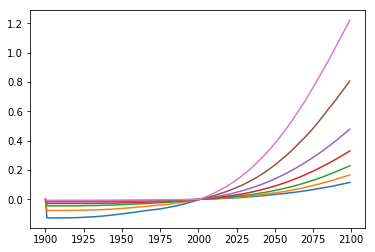

In [5]:
print(len(Time))
print(len(SL_wTd_nos_base_UA_UNN_R0_RCP45_cdf[0:-1,500]))
plt.plot(Time,SL_wTd_nos_base_UA_UNN_R0_RCP45_cdf[0:-1,10])
plt.plot(Time,SL_wTd_nos_base_UA_UNN_R0_RCP45_cdf[0:-1,50])
plt.plot(Time,SL_wTd_nos_base_UA_UNN_R0_RCP45_cdf[0:-1,166])
plt.plot(Time,SL_wTd_nos_base_UA_UNN_R0_RCP45_cdf[0:-1,500])
plt.plot(Time,SL_wTd_nos_base_UA_UNN_R0_RCP45_cdf[0:-1,833])
plt.plot(Time,SL_wTd_nos_base_UA_UNN_R0_RCP45_cdf[0:-1,950])
plt.plot(Time,SL_wTd_nos_base_UA_UNN_R0_RCP45_cdf[0:-1,990])



In [6]:
print(SL_wTd_nos_base_UA_UNN_R0_RCP45_cdf[-1,950])

0.821526825428009
